**Load Dependencies**

In [1]:
# load fundamental packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [2]:
# load keras package

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, EarlyStopping

Using TensorFlow backend.


**Load the Dataset**

In [3]:
# load the data

from keras.datasets import mnist

# train-test split

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# set seed for random state

np.random.seed(2017)

In [5]:
# take a look at training predictor

x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [5]:
# take a look at training response

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
# dimensions of training and testing set

print("Original dataset:")
print("training x: ", "shape ", x_train.shape, " type ", type(x_train))
print("training y: ", "shape ", y_train.shape, " type ", type(y_train))
print("testing x: ", "shape ", x_test.shape, " type ", type(x_test))
print("testing y: ", "shape ", y_test.shape, " type ", type(y_test))

Original dataset:
training x:  shape  (60000, 28, 28)  type  <class 'numpy.ndarray'>
training y:  shape  (60000,)  type  <class 'numpy.ndarray'>
testing x:  shape  (10000, 28, 28)  type  <class 'numpy.ndarray'>
testing y:  shape  (10000,)  type  <class 'numpy.ndarray'>


**Preprocess the Dataset**

In [6]:
# scale the data
scale_pixel = 255.0

# reshape the data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

n_train = x_train.shape[0] # number of training observations
n_test = x_test.shape[0] # number of test observations

x_train = x_train.reshape(n_train, 784) # 28*28 pixels
x_test = x_test.reshape(n_test, 784) # 28*28 pixels

# convert integer labels to dummy variables
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
# dimensions of training and testing set after normalization

print("After normalization:")
print("training x: ", "shape ", x_train.shape, " type ", type(x_train))
print("training y: ", "shape ", y_train.shape, " type ", type(y_train))
print("testing x: ", "shape ", x_test.shape, " type ", type(x_test))
print("testing y: ", "shape ", y_test.shape, " type ", type(y_test))

After normalization:
training x:  shape  (60000, 784)  type  <class 'numpy.ndarray'>
training y:  shape  (60000, 10)  type  <class 'numpy.ndarray'>
testing x:  shape  (10000, 784)  type  <class 'numpy.ndarray'>
testing y:  shape  (10000, 10)  type  <class 'numpy.ndarray'>


**ANN Base Model**

In [10]:
# model parameters

train_size = 20000

# random sampling from training set
idx = np.random.choice(np.arange(n_train), train_size, replace=False) # 60000 choose 20000
x_sample = x_train[idx]
y_sample = y_train[idx]

# hyperparameters
learning_rate = 0.5
batch_size = 300
epoch_num = 20


In [11]:
# base model

model = Sequential()
model.add(Dense(300, activation='relu', input_dim=(784)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
# compile the model

model.compile(optimizer=SGD(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history1 = model.fit(x_sample, y_sample, validation_split=0.3, batch_size=batch_size, epochs=epoch_num)

Train on 14000 samples, validate on 6000 samples
Epoch 1/20
14000/14000 [==============================] - 1s - loss: 0.9739 - acc: 0.6961 - val_loss: 0.5958 - val_acc: 0.8067
Epoch 2/20
14000/14000 [==============================] - 1s - loss: 0.3326 - acc: 0.8939 - val_loss: 0.2651 - val_acc: 0.9218
Epoch 3/20
14000/14000 [==============================] - 1s - loss: 0.2132 - acc: 0.9358 - val_loss: 0.2374 - val_acc: 0.9302
Epoch 4/20
14000/14000 [==============================] - 1s - loss: 0.1783 - acc: 0.9463 - val_loss: 0.2224 - val_acc: 0.9308
Epoch 5/20
14000/14000 [==============================] - 1s - loss: 0.1277 - acc: 0.9612 - val_loss: 0.2108 - val_acc: 0.9368
Epoch 6/20
14000/14000 [==============================] - 1s - loss: 0.1045 - acc: 0.9689 - val_loss: 0.1699 - val_acc: 0.9498
Epoch 7/20
14000/14000 [==============================] - 1s - loss: 0.0917 - acc: 0.9744 - val_loss: 0.1746 - val_acc: 0.9483
Epoch 8/20
14000/14000 [==============================] - 1s -

In [14]:
# model performance on testing set

score = model.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9440/10000 [===========================>..] - ETA: 0sTest Loss:  0.115154625503
Test Accuracy:  0.9664
FOM:  0.200266666667


**Visualize the Training Process**

In [21]:
# define a function to plot the metrics
def f_plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


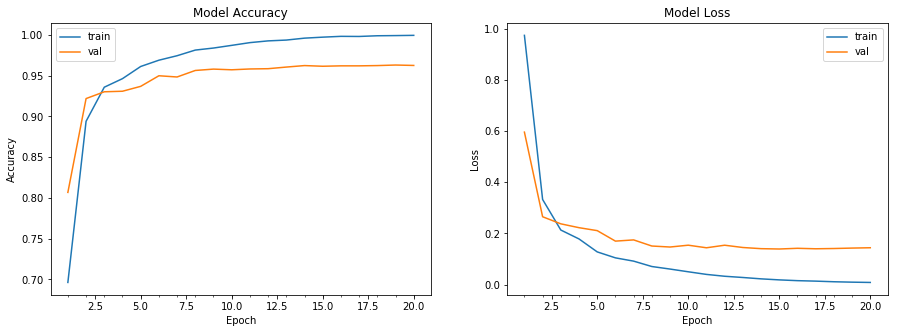

In [16]:
f_plot_model_history(history1)

**Influence of Training Size**

In [17]:
# influence of training size

#2e2, 1e3, 2e3, 3e3, 4e3, 5e3, 6e3, 7e3, 8e3, 9e3, 1e4, 2e4, 3e4, 4e4
list_train_size = [2e2, 1e3, 2e3, 3e3, 4e3, 5e3, 6e3, 7e3, 8e3, 9e3, 1e4, 2e4, 3e4, 4e4]
list_hist1 = []
list_loss1 = []
list_accuracy1 = []
list_FOM1 = []

for sz in list_train_size:
    # sample sz number of instances
    idx_sp = np.random.choice(np.arange(n_train), int(sz), replace=False) # 60000 choose number of [size]
    x_sp = x_train[idx_sp]
    y_sp = y_train[idx_sp]
    
    # feed the data into the same model
    hist = model.fit(x_sp, y_sp, validation_split=0.3, batch_size=batch_size, epochs=epoch_num, verbose=0) 
    score = model.evaluate(x_test, y_test)
    loss = score[0]  
    p1 = len(x_sp)/len(x_train)
    p2 = score[1]  # accuracy
    FOM = p1/2 + (1-p2)
    
    list_hist1.append(hist)
    list_loss1.append(loss)
    list_accuracy1.append(p2)
    list_FOM1.append(FOM)
    

 9440/10000 [===========================>..] - ETA: 0s

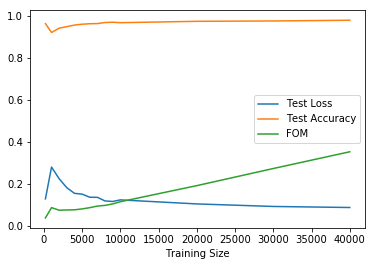

In [18]:
fig1 = plt.figure()
axs1 = fig1.add_subplot(111)
axs1.set_xlabel('Training Size')
axs1.plot(list_train_size, list_loss1, label='Test Loss')
axs1.plot(list_train_size, list_accuracy1, label='Test Accuracy')
axs1.plot(list_train_size, list_FOM1, label='FOM')
axs1.legend()

**Influence of Learning Rate**

In [19]:
# influence of training size

list_learning_rate = [0.5, 0.25, 0.1, 1e-2, 1e-3, 1e-4, 1e-5]
list_hist2 = []
list_loss2 = []
list_accuracy2 = []
list_FOM2 = []

for lr in list_learning_rate:
    
    # change the learning rate for each training session
    model.compile(optimizer=SGD(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(x_sample, y_sample, validation_split=0.3, batch_size=batch_size, epochs=epoch_num, verbose=0) 
    score = model.evaluate(x_test, y_test)
    loss = score[0]  
    p1 = len(x_sample)/len(x_train)
    p2 = score[1]  # accuracy
    FOM = p1/2 + (1-p2)
    
    list_hist2.append(hist)
    list_loss2.append(loss)
    list_accuracy2.append(p2)
    list_FOM2.append(FOM)
    

 9696/10000 [============================>.] - ETA: 0s

In [20]:
print(list_loss2)
print(list_accuracy2)
print(list_FOM2)

[0.089349112848050666, 0.091155262128086681, 0.091678529434156331, 0.091735510183597171, 0.091740632485254131, 0.091740909504552062, 0.091740923966769292]
[0.98050000000000004, 0.98019999999999996, 0.98019999999999996, 0.98019999999999996, 0.98019999999999996, 0.98019999999999996, 0.98019999999999996]
[0.18616666666666662, 0.1864666666666667, 0.1864666666666667, 0.1864666666666667, 0.1864666666666667, 0.1864666666666667, 0.1864666666666667]


In [21]:
result_lr = {'Learning Rate':list_learning_rate,'Loss':list_loss2,'Accuracy':list_accuracy2,'FOM':list_FOM2}
df_lr = pd.DataFrame.from_dict(result_lr)
df_lr = df_lr[['Learning Rate','Loss','Accuracy','FOM']]
df_lr

,Learning Rate,Loss,Accuracy,FOM
0,0.50000,0.089349,0.9805,0.186167
1,0.25000,0.091155,0.9802,0.186467
2,0.10000,0.091679,0.9802,0.186467
3,0.01000,0.091736,0.9802,0.186467
4,0.00100,0.091741,0.9802,0.186467
5,0.00010,0.091741,0.9802,0.186467
6,0.00001,0.091741,0.9802,0.186467


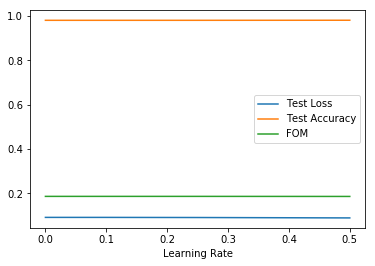

In [22]:
fig2 = plt.figure()
axs2 = fig2.add_subplot(111)
axs2.set_xlabel('Learning Rate')
axs2.plot(list_learning_rate, list_loss2, label='Test Loss')
axs2.plot(list_learning_rate, list_accuracy2, label='Test Accuracy')
axs2.plot(list_learning_rate, list_FOM2, label='FOM')
axs2.legend()

**CNN - Convolutional Neural Network**

In [16]:
# reshape the dataset for CNN

x_train = x_train.reshape(n_train, 28, 28, 1)
x_test = x_test.reshape(n_test, 28, 28, 1)

In [24]:
# dimensions of training and testing set after reshaping to 28*28

print("After reshaping:")
print("training x: ", "shape ", x_train.shape, " type ", type(x_train))
print("training y: ", "shape ", y_train.shape, " type ", type(y_train))
print("testing x: ", "shape ", x_test.shape, " type ", type(x_test))
print("testing y: ", "shape ", y_test.shape, " type ", type(y_test))

After reshaping:
training x:  shape  (60000, 28, 28, 1)  type  <class 'numpy.ndarray'>
training y:  shape  (60000, 10)  type  <class 'numpy.ndarray'>
testing x:  shape  (10000, 28, 28, 1)  type  <class 'numpy.ndarray'>
testing y:  shape  (10000, 10)  type  <class 'numpy.ndarray'>


In [25]:
# model parameters (remain unchanged)

train_size = 20000

# random sampling from training set
idx = np.random.choice(np.arange(n_train), train_size, replace=False) # 60000 choose 20000
x_sample = x_train[idx]
y_sample = y_train[idx]

# hyperparameters
learning_rate = 0.5
batch_size = 300
epoch_num = 20


In [26]:
# CNN model architecture

model_CNN = Sequential() # initiate

# convolutional layer
model_CNN.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model_CNN.add(MaxPool2D(strides=(2,2)))
model_CNN.add(BatchNormalization())

# convolutional layer
model_CNN.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN.add(MaxPool2D(strides=(2,2)))
model_CNN.add(BatchNormalization())

# fully connected layer
model_CNN.add(Flatten())
model_CNN.add(Dense(300, activation='relu'))
model_CNN.add(Dense(100, activation='relu'))

# output layer
model_CNN.add(Dense(10, activation='softmax'))

In [27]:
# compile the model

model_CNN.compile(optimizer=SGD(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# training history

history2 = model_CNN.fit(x_sample, y_sample, validation_split=0.3, batch_size=batch_size, epochs=epoch_num)

Train on 14000 samples, validate on 6000 samples
Epoch 1/20
14000/14000 [==============================] - 59s - loss: 0.4972 - acc: 0.8460 - val_loss: 0.9679 - val_acc: 0.7918
Epoch 2/20
14000/14000 [==============================] - 55s - loss: 0.0698 - acc: 0.9789 - val_loss: 1.2294 - val_acc: 0.5648
Epoch 3/20
14000/14000 [==============================] - 52s - loss: 0.0517 - acc: 0.9859 - val_loss: 1.1547 - val_acc: 0.5730
Epoch 4/20
14000/14000 [==============================] - 51s - loss: 0.0271 - acc: 0.9923 - val_loss: 0.9316 - val_acc: 0.6875
Epoch 5/20
14000/14000 [==============================] - 51s - loss: 0.0130 - acc: 0.9971 - val_loss: 0.5115 - val_acc: 0.8202
Epoch 6/20
14000/14000 [==============================] - 52s - loss: 0.0072 - acc: 0.9988 - val_loss: 0.2828 - val_acc: 0.9025
Epoch 7/20
14000/14000 [==============================] - 55s - loss: 0.0047 - acc: 0.9995 - val_loss: 0.1867 - val_acc: 0.9372
Epoch 8/20
14000/14000 [==============================]

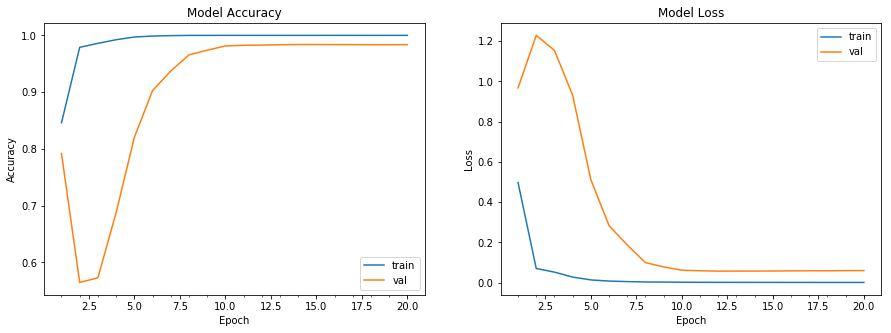

In [29]:
f_plot_model_history(history2)

In [30]:
# model performance on testing set

score = model_CNN.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

10000/10000 [==============================] - 13s    

Test Loss:  0.0470036370637
Test Accuracy:  0.9872
FOM:  0.179466666667


**Modification:**  Decrease the Training Size

In [31]:
# model parameters (decrease the training size to 2000)

train_size = 2000

# random sampling from training set
idx = np.random.choice(np.arange(n_train), train_size, replace=False) # 60000 choose 20000
x_sample = x_train[idx]
y_sample = y_train[idx]

# hyperparameters
# learning_rate = 0.5
# batch_size = 300
# epoch_num = 20


In [32]:
# training history

history3 = model_CNN.fit(x_sample, y_sample, validation_split=0.3, batch_size=batch_size, epochs=epoch_num)

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 5s - loss: 0.0765 - acc: 0.9793 - val_loss: 0.2264 - val_acc: 0.9433
Epoch 2/20
1400/1400 [==============================] - 5s - loss: 1.5127 - acc: 0.7800 - val_loss: 8.0293 - val_acc: 0.4167
Epoch 3/20
1400/1400 [==============================] - 5s - loss: 2.0738 - acc: 0.6057 - val_loss: 2.7318 - val_acc: 0.6433
Epoch 4/20
1400/1400 [==============================] - 5s - loss: 0.2013 - acc: 0.9436 - val_loss: 1.5051 - val_acc: 0.7850
Epoch 5/20
1400/1400 [==============================] - 5s - loss: 0.0904 - acc: 0.9779 - val_loss: 1.7516 - val_acc: 0.7500
Epoch 6/20
1400/1400 [==============================] - 5s - loss: 0.0534 - acc: 0.9843 - val_loss: 0.9459 - val_acc: 0.8450
Epoch 7/20
1400/1400 [==============================] - 5s - loss: 0.0352 - acc: 0.9929 - val_loss: 0.7343 - val_acc: 0.8700
Epoch 8/20
1400/1400 [==============================] - 5s - loss: 0.0221 - ac

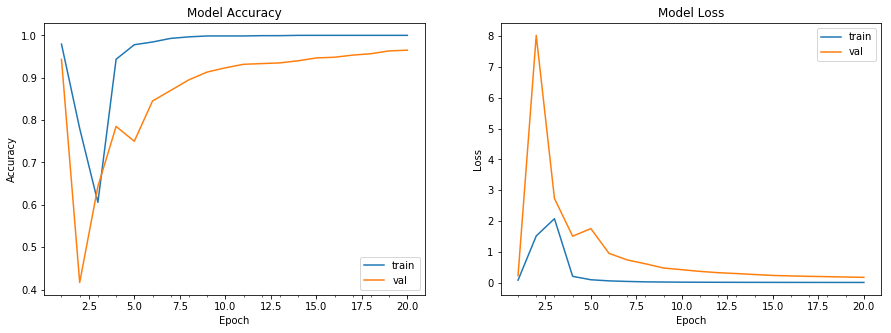

In [33]:
f_plot_model_history(history3)

In [34]:
# model performance on testing set

score = model_CNN.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9984/10000 [============================>.] - ETA: 0s
Test Loss:  0.171410695977
Test Accuracy:  0.9626
FOM:  0.0540666666667


**Add Dropout Layers**

In [35]:
# CNN model architecture

model_CNN2 = Sequential() # initiate

# convolutional layer
model_CNN2.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model_CNN2.add(BatchNormalization())
model_CNN2.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model_CNN2.add(MaxPool2D(strides=(2,2)))
model_CNN2.add(BatchNormalization())

# convolutional layer
model_CNN2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN2.add(BatchNormalization())
model_CNN2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN2.add(MaxPool2D(strides=(2,2)))
model_CNN2.add(BatchNormalization())

# fully connected layer
model_CNN2.add(Flatten())
model_CNN2.add(Dense(300,activation='relu'))
model_CNN2.add(Dropout(0.2))
model_CNN2.add(Dense(100,activation='relu'))
model_CNN2.add(Dropout(0.2))

# add a dense layer (output layer, 10 categories)
model_CNN2.add(Dense(10,activation='softmax'))

In [36]:
# compile the model

model_CNN2.compile(optimizer=SGD(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# training history

history4 = model_CNN2.fit(x_sample, y_sample, validation_split=0.3, batch_size=batch_size, epochs=epoch_num)

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 6s - loss: 2.4542 - acc: 0.2221 - val_loss: 2.1577 - val_acc: 0.1417
Epoch 2/20
1400/1400 [==============================] - 5s - loss: 1.1673 - acc: 0.6114 - val_loss: 1.7433 - val_acc: 0.4483
Epoch 3/20
1400/1400 [==============================] - 6s - loss: 0.4788 - acc: 0.8650 - val_loss: 1.6192 - val_acc: 0.5233
Epoch 4/20
1400/1400 [==============================] - 5s - loss: 0.3618 - acc: 0.8957 - val_loss: 1.3458 - val_acc: 0.7983
Epoch 5/20
1400/1400 [==============================] - 5s - loss: 0.1739 - acc: 0.9443 - val_loss: 1.2106 - val_acc: 0.8017
Epoch 6/20
1400/1400 [==============================] - 5s - loss: 0.3313 - acc: 0.8986 - val_loss: 1.0195 - val_acc: 0.8583
Epoch 7/20
1400/1400 [==============================] - 5s - loss: 0.1434 - acc: 0.9607 - val_loss: 1.0104 - val_acc: 0.8333
Epoch 8/20
1400/1400 [==============================] - 5s - loss: 0.0852 - ac

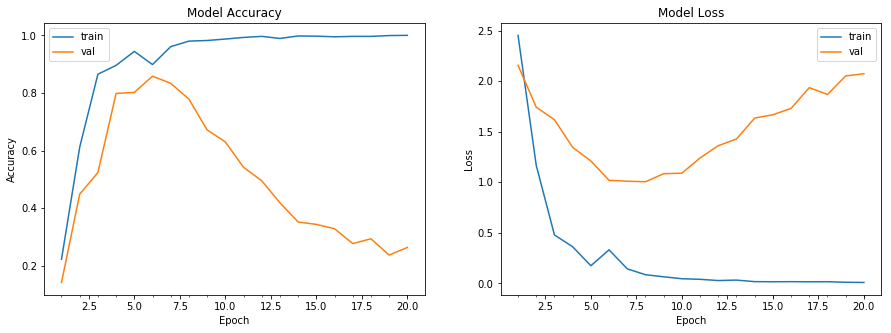

In [38]:
f_plot_model_history(history4)

In [39]:
# model performance on testing set

score = model_CNN2.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

10000/10000 [==============================] - 14s    

Test Loss:  1.95319421539
Test Accuracy:  0.297
FOM:  0.719666666667


In [40]:
# CNN model architecture

model_CNN3 = Sequential() # initiate

# convolutional layer
model_CNN3.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model_CNN3.add(BatchNormalization())
model_CNN3.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model_CNN3.add(MaxPool2D(strides=(2,2)))
model_CNN3.add(BatchNormalization())
model_CNN3.add(Dropout(0.25))

# convolutional layer
model_CNN3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN3.add(BatchNormalization())
model_CNN3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN3.add(MaxPool2D(strides=(2,2)))
model_CNN3.add(BatchNormalization())
model_CNN3.add(Dropout(0.25))


# fully connected layer
model_CNN3.add(Flatten())
model_CNN3.add(Dense(512,activation='relu')) # increased the number of neurons
model_CNN3.add(Dropout(0.25))
model_CNN3.add(Dense(1024,activation='relu')) # increase the number of neurons
model_CNN3.add(Dropout(0.5))

# add a dense layer (output layer, 10 categories)
model_CNN3.add(Dense(10,activation='softmax'))

In [41]:
# compile the model

model_CNN3.compile(optimizer=SGD(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# training history

history5 = model_CNN3.fit(x_sample, y_sample, validation_split=0.3, batch_size=batch_size, epochs=epoch_num)

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 7s - loss: 4.6237 - acc: 0.1857 - val_loss: 2.2491 - val_acc: 0.2017
Epoch 2/20
1400/1400 [==============================] - 5s - loss: 1.6273 - acc: 0.6050 - val_loss: 1.8031 - val_acc: 0.6133
Epoch 3/20
1400/1400 [==============================] - 5s - loss: 0.7914 - acc: 0.7386 - val_loss: 1.5384 - val_acc: 0.5783
Epoch 4/20
1400/1400 [==============================] - 5s - loss: 0.3700 - acc: 0.8893 - val_loss: 1.1757 - val_acc: 0.8533
Epoch 5/20
1400/1400 [==============================] - 5s - loss: 0.3805 - acc: 0.8829 - val_loss: 1.0571 - val_acc: 0.7850
Epoch 6/20
1400/1400 [==============================] - 5s - loss: 0.2894 - acc: 0.9050 - val_loss: 0.8498 - val_acc: 0.8950
Epoch 7/20
1400/1400 [==============================] - 5s - loss: 0.1858 - acc: 0.9443 - val_loss: 1.2058 - val_acc: 0.7183
Epoch 8/20
1400/1400 [==============================] - 5s - loss: 0.1339 - ac

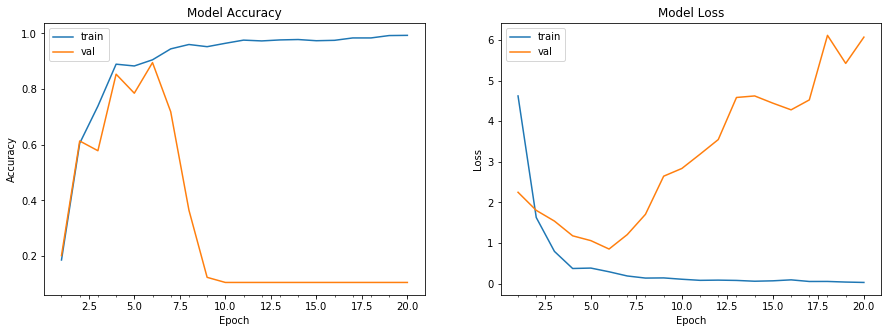

In [43]:
f_plot_model_history(history5)

In [44]:
# model performance on testing set

score = model_CNN3.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9984/10000 [============================>.] - ETA: 0s
Test Loss:  6.03637963409
Test Accuracy:  0.1135
FOM:  0.903166666667


In [45]:
# CNN model architecture (add an extra convolutional layer)

model_CNN4 = Sequential() # initiate

# convolutional layer
model_CNN4.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model_CNN4.add(BatchNormalization())
model_CNN4.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model_CNN4.add(MaxPool2D(strides=(2,2)))
model_CNN4.add(BatchNormalization())
model_CNN4.add(Dropout(0.25))

# convolutional layer
model_CNN4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN4.add(BatchNormalization())
model_CNN4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN4.add(MaxPool2D(strides=(2,2)))
model_CNN4.add(BatchNormalization())
model_CNN4.add(Dropout(0.25))

# convolutional layer
model_CNN4.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model_CNN4.add(BatchNormalization())
model_CNN4.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model_CNN4.add(MaxPool2D(strides=(2,2)))
model_CNN4.add(BatchNormalization())
model_CNN4.add(Dropout(0.25))

# fully connected layer
model_CNN4.add(Flatten())
model_CNN4.add(Dense(512, activation='relu'))
model_CNN4.add(Dropout(0.25))
model_CNN4.add(Dense(1024, activation='relu'))
model_CNN4.add(Dropout(0.5))

# output layer
model_CNN4.add(Dense(10, activation='softmax'))

In [46]:
# compile the model

model_CNN4.compile(optimizer=SGD(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
# training history

history6 = model_CNN4.fit(x_sample, y_sample, validation_split=0.3, batch_size=batch_size, epochs=epoch_num)

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 8s - loss: 2.3199 - acc: 0.1757 - val_loss: 2.2786 - val_acc: 0.1833
Epoch 2/20
1400/1400 [==============================] - 5s - loss: 1.3571 - acc: 0.5536 - val_loss: 2.1788 - val_acc: 0.1833
Epoch 3/20
1400/1400 [==============================] - 5s - loss: 1.0281 - acc: 0.6671 - val_loss: 1.9748 - val_acc: 0.5283
Epoch 4/20
1400/1400 [==============================] - 6s - loss: 0.4817 - acc: 0.8371 - val_loss: 1.9082 - val_acc: 0.4917
Epoch 5/20
1400/1400 [==============================] - 6s - loss: 0.3217 - acc: 0.9014 - val_loss: 1.8702 - val_acc: 0.3733
Epoch 6/20
1400/1400 [==============================] - 5s - loss: 0.2643 - acc: 0.9100 - val_loss: 2.1504 - val_acc: 0.1950
Epoch 7/20
1400/1400 [==============================] - 5s - loss: 0.1858 - acc: 0.9443 - val_loss: 2.5473 - val_acc: 0.1050
Epoch 8/20
1400/1400 [==============================] - 5s - loss: 0.2034 - ac

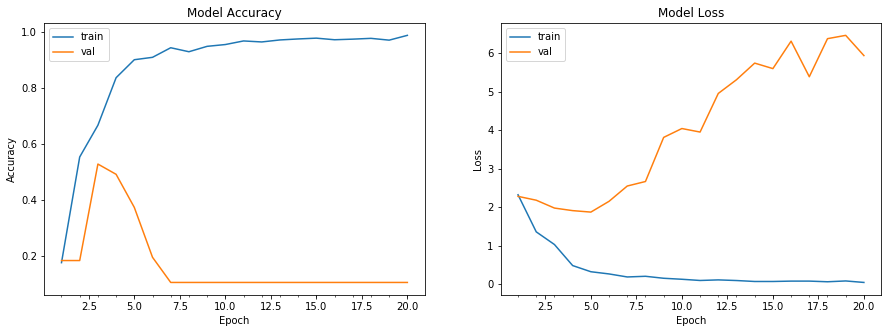

In [48]:
f_plot_model_history(history6)

In [49]:
# model performance on testing set

score = model_CNN4.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9984/10000 [============================>.] - ETA: 0s
Test Loss:  5.88123601837
Test Accuracy:  0.1135
FOM:  0.903166666667


**Tune the Hyper Parameters**

In [50]:
# change the hyperparameters

learning_rate = 0.5
batch_size = 300
epoch_num2 = 30 # increased to 30

In [51]:
# training history
# change the validation split to 0.04

history7 = model_CNN3.fit(x_sample, y_sample, validation_split=0.04, batch_size=batch_size, epochs=epoch_num2)

Train on 1920 samples, validate on 80 samples
Epoch 1/30
1920/1920 [==============================] - 6s - loss: 0.0727 - acc: 0.9766 - val_loss: 7.0732 - val_acc: 0.0375
Epoch 2/30
1920/1920 [==============================] - 6s - loss: 0.0589 - acc: 0.9833 - val_loss: 6.3302 - val_acc: 0.0375
Epoch 3/30
1920/1920 [==============================] - 6s - loss: 0.0878 - acc: 0.9667 - val_loss: 7.0659 - val_acc: 0.0375
Epoch 4/30
1920/1920 [==============================] - 6s - loss: 0.0424 - acc: 0.9880 - val_loss: 7.0574 - val_acc: 0.0375
Epoch 5/30
1920/1920 [==============================] - 6s - loss: 0.0462 - acc: 0.9828 - val_loss: 8.5728 - val_acc: 0.0375
Epoch 6/30
1920/1920 [==============================] - 6s - loss: 0.0356 - acc: 0.9885 - val_loss: 5.8147 - val_acc: 0.0750
Epoch 7/30
1920/1920 [==============================] - 6s - loss: 0.0376 - acc: 0.9870 - val_loss: 7.7191 - val_acc: 0.0375
Epoch 8/30
1920/1920 [==============================] - 6s - loss: 0.0272 - acc

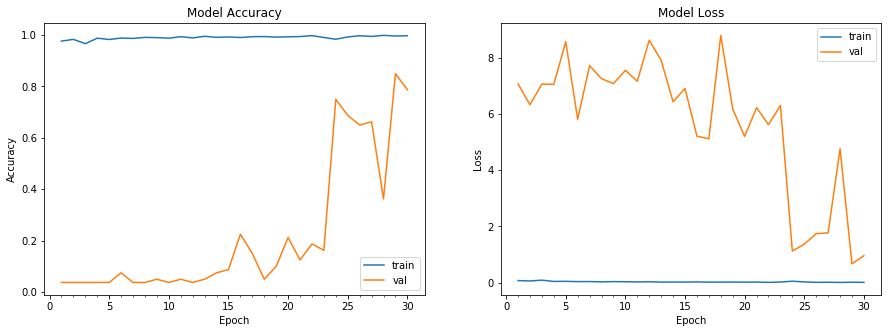

In [52]:
f_plot_model_history(history7)

In [53]:
# model performance on testing set

score = model_CNN3.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9984/10000 [============================>.] - ETA: 0s
Test Loss:  0.758170562828
Test Accuracy:  0.8372
FOM:  0.179466666667


**Artificial Expansion**

In [13]:
# image generator

gen_img = ImageDataGenerator(zoom_range=0.2,
                             height_shift_range=0.2,
                             width_shift_range=0.2,
                             rotation_range=20)

In [55]:
# create validation dataset

val_size = 80

# random sampling from training set
idx = np.random.choice(np.arange(n_train), val_size, replace=False) # 60000 choose 80
x_val = x_train[idx]
y_val = y_train[idx]

In [56]:
history8 = model_CNN3.fit_generator(gen_img.flow(x_sample, y_sample, batch_size=batch_size),
                                    validation_data=(x_val, y_val), epochs=epoch_num2, steps_per_epoch=50,
                                    callbacks=[EarlyStopping(patience=3)])

Epoch 1/30
50/50 [==============================] - 53s - loss: 1.3224 - acc: 0.6020 - val_loss: 0.5922 - val_acc: 0.8750
Epoch 2/30
50/50 [==============================] - 52s - loss: 0.5817 - acc: 0.8139 - val_loss: 0.5151 - val_acc: 0.9000
Epoch 3/30
50/50 [==============================] - 52s - loss: 0.4081 - acc: 0.8730 - val_loss: 0.2684 - val_acc: 0.9250
Epoch 4/30
50/50 [==============================] - 55s - loss: 0.3483 - acc: 0.8907 - val_loss: 0.2283 - val_acc: 0.9625
Epoch 5/30
50/50 [==============================] - 53s - loss: 0.3030 - acc: 0.9045 - val_loss: 0.1989 - val_acc: 0.9625
Epoch 6/30
50/50 [==============================] - 60s - loss: 0.2716 - acc: 0.9153 - val_loss: 0.1425 - val_acc: 0.9625
Epoch 7/30
50/50 [==============================] - 53s - loss: 0.2334 - acc: 0.9240 - val_loss: 0.2472 - val_acc: 0.9625
Epoch 8/30
50/50 [==============================] - 56s - loss: 0.2279 - acc: 0.9284 - val_loss: 0.1824 - val_acc: 0.9375
Epoch 9/30
50/50 [======

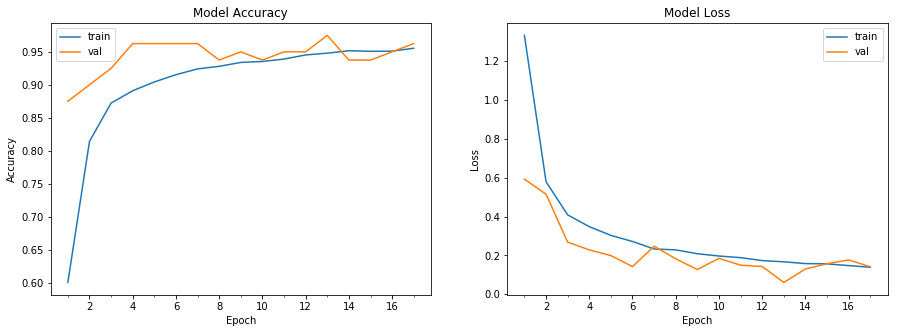

In [57]:
f_plot_model_history(history8)

In [58]:
# model performance on testing set

score = model_CNN3.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9984/10000 [============================>.] - ETA: 0s
Test Loss:  0.0492120004125
Test Accuracy:  0.9854
FOM:  0.0312666666667


In [59]:
### 1:10 AM 04/30/2017

In [60]:
history9 = model_CNN3.fit_generator(gen_img.flow(x_sample, y_sample, batch_size=batch_size),
                                    validation_data=(x_val, y_val), epochs=epoch_num2, steps_per_epoch=100,
                                    callbacks=[EarlyStopping(patience=5)])

Epoch 1/30
100/100 [==============================] - 97s - loss: 0.1343 - acc: 0.9571 - val_loss: 0.1726 - val_acc: 0.9625
Epoch 2/30
100/100 [==============================] - 96s - loss: 0.1284 - acc: 0.9582 - val_loss: 0.1592 - val_acc: 0.9625
Epoch 3/30
100/100 [==============================] - 931s - loss: 0.1186 - acc: 0.9630 - val_loss: 0.1666 - val_acc: 0.9500
Epoch 4/30
100/100 [==============================] - 99s - loss: 0.1187 - acc: 0.9618 - val_loss: 0.1973 - val_acc: 0.9500
Epoch 5/30
100/100 [==============================] - 99s - loss: 0.1082 - acc: 0.9661 - val_loss: 0.1264 - val_acc: 0.9500
Epoch 6/30
100/100 [==============================] - 99s - loss: 0.0995 - acc: 0.9675 - val_loss: 0.1147 - val_acc: 0.9750
Epoch 7/30
100/100 [==============================] - 98s - loss: 0.1047 - acc: 0.9664 - val_loss: 0.0970 - val_acc: 0.9500
Epoch 8/30
100/100 [==============================] - 98s - loss: 0.0964 - acc: 0.9695 - val_loss: 0.1899 - val_acc: 0.9750
Epoch 9

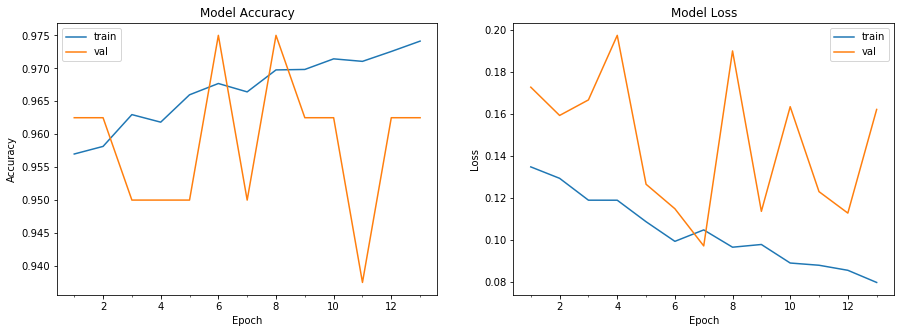

In [61]:
f_plot_model_history(history9)

In [62]:
# model performance on testing set

score = model_CNN3.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9984/10000 [============================>.] - ETA: 0s
Test Loss:  0.0529831009318
Test Accuracy:  0.9859
FOM:  0.0307666666667


**Modification:**   
1. Decrease the learning rate  
2. Increase the validation size
3. Random Uniform Initialization

In [7]:
# CNN model architecture

model_CNN5 = Sequential() # initiate

# convolutional layer
model_CNN5.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1),
                      kernel_initializer='random_uniform'))  # use random uniform distribution to initialize
model_CNN5.add(BatchNormalization())
model_CNN5.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model_CNN5.add(MaxPool2D(strides=(2,2)))
model_CNN5.add(BatchNormalization())
model_CNN5.add(Dropout(0.25))

# convolutional layer
model_CNN5.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN5.add(BatchNormalization())
model_CNN5.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_CNN5.add(MaxPool2D(strides=(2,2)))
model_CNN5.add(BatchNormalization())
model_CNN5.add(Dropout(0.25))


# fully connected layer
model_CNN5.add(Flatten())
model_CNN5.add(Dense(512,activation='relu')) # increased the number of neurons
model_CNN5.add(Dropout(0.25))
model_CNN5.add(Dense(1024,activation='relu')) # increase the number of neurons
model_CNN5.add(Dropout(0.5))

# add a dense layer (output layer, 10 categories)
model_CNN5.add(Dense(10,activation='softmax'))

In [8]:
# change the hyperparameters

learning_rate2 = 0.05
batch_size = 300
epoch_num2 = 30 # increased to 30

In [9]:
# compile the model

model_CNN5.compile(optimizer=SGD(lr=learning_rate2), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# model parameters (decrease the training size to 2000)

train_size = 2000

# random sampling from training set
idx = np.random.choice(np.arange(n_train), train_size, replace=False) # 60000 choose 2000
x_sample = x_train[idx]
y_sample = y_train[idx]

In [18]:
# create validation dataset (increase validation size to 200)

val_size = 200

# random sampling from training set
idx = np.random.choice(np.arange(n_train), val_size, replace=False) # 60000 choose 80
x_val = x_train[idx]
y_val = y_train[idx]

In [19]:
history10 = model_CNN5.fit_generator(gen_img.flow(x_sample, y_sample, batch_size=batch_size),
                                    validation_data=(x_val, y_val), epochs=epoch_num2, steps_per_epoch=100,
                                    callbacks=[EarlyStopping(patience=5)])

Epoch 1/30
100/100 [==============================] - 100s - loss: 1.9335 - acc: 0.3215 - val_loss: 2.8744 - val_acc: 0.1250
Epoch 2/30
100/100 [==============================] - 98s - loss: 1.1589 - acc: 0.6034 - val_loss: 4.6236 - val_acc: 0.1200
Epoch 3/30
100/100 [==============================] - 96s - loss: 0.8282 - acc: 0.7221 - val_loss: 4.5897 - val_acc: 0.2250
Epoch 4/30
100/100 [==============================] - 96s - loss: 0.6575 - acc: 0.7846 - val_loss: 3.6143 - val_acc: 0.3200
Epoch 5/30
100/100 [==============================] - 96s - loss: 0.5606 - acc: 0.8199 - val_loss: 1.8349 - val_acc: 0.4850
Epoch 6/30
100/100 [==============================] - 97s - loss: 0.4804 - acc: 0.8437 - val_loss: 0.3502 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 96s - loss: 0.4178 - acc: 0.8681 - val_loss: 0.1799 - val_acc: 0.9400
Epoch 8/30
100/100 [==============================] - 99s - loss: 0.3968 - acc: 0.8726 - val_loss: 0.1499 - val_acc: 0.9500
Epoch 9

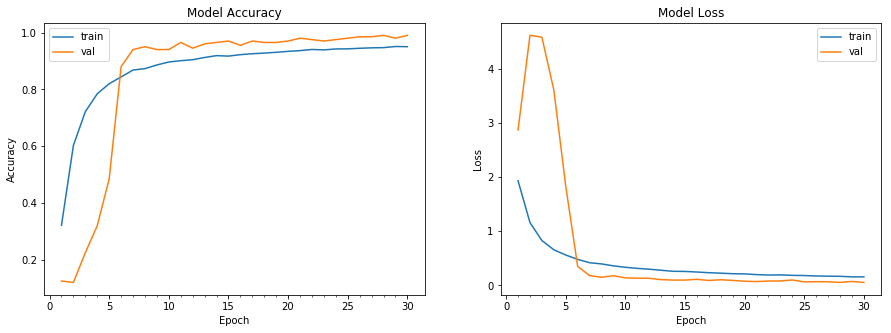

In [22]:
f_plot_model_history(history10)

In [23]:
# model performance on testing set

score = model_CNN5.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9984/10000 [============================>.] - ETA: 0s
Test Loss:  0.0441268049651
Test Accuracy:  0.985
FOM:  0.0316666666667


In [24]:
# model parameters (decrease the training size to 2000)

train_size2 = 1000

# random sampling from training set
idx = np.random.choice(np.arange(n_train), train_size, replace=False) # 60000 choose 2000
x_sample = x_train[idx]
y_sample = y_train[idx]

In [25]:
history11 = model_CNN5.fit_generator(gen_img.flow(x_sample, y_sample, batch_size=batch_size),
                                    validation_data=(x_val, y_val), epochs=epoch_num2, steps_per_epoch=100,
                                    callbacks=[EarlyStopping(patience=5)])

Epoch 1/30
100/100 [==============================] - 96s - loss: 0.2187 - acc: 0.9314 - val_loss: 0.0507 - val_acc: 0.9900
Epoch 2/30
100/100 [==============================] - 99s - loss: 0.2026 - acc: 0.9369 - val_loss: 0.0402 - val_acc: 0.9900
Epoch 3/30
100/100 [==============================] - 97s - loss: 0.2007 - acc: 0.9392 - val_loss: 0.0425 - val_acc: 0.9900
Epoch 4/30
100/100 [==============================] - 96s - loss: 0.1949 - acc: 0.9376 - val_loss: 0.0467 - val_acc: 0.9900
Epoch 5/30
100/100 [==============================] - 96s - loss: 0.1856 - acc: 0.9408 - val_loss: 0.0507 - val_acc: 0.9900
Epoch 6/30
100/100 [==============================] - 96s - loss: 0.1711 - acc: 0.9462 - val_loss: 0.0528 - val_acc: 0.9900
Epoch 7/30
100/100 [==============================] - 96s - loss: 0.1743 - acc: 0.9455 - val_loss: 0.0515 - val_acc: 0.9850
Epoch 8/30
100/100 [==============================] - 96s - loss: 0.1670 - acc: 0.9459 - val_loss: 0.0435 - val_acc: 0.9850


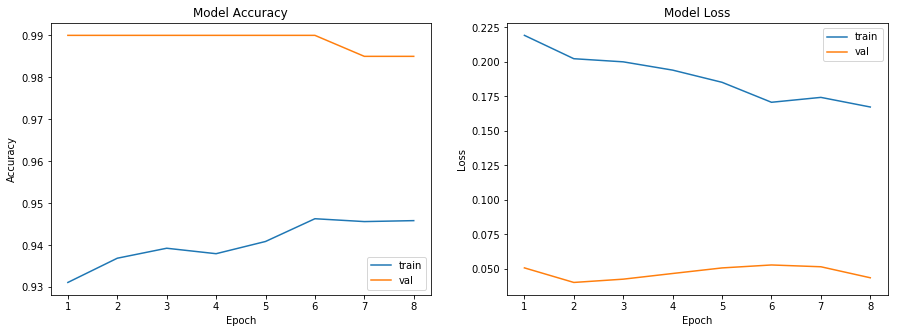

In [26]:
f_plot_model_history(history11)

In [27]:
# model performance on testing set

score = model_CNN5.evaluate(x_test, y_test)

p1 = len(x_sample)/len(x_train)
p2 = score[1]
FOM = p1/2 + (1-p2)

print()
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])
print("FOM: ", FOM)

 9984/10000 [============================>.] - ETA: 0s
Test Loss:  0.0418975893818
Test Accuracy:  0.9862
FOM:  0.0304666666667
